# Machine Learning IPN - Trabajo 10 marzo 2021
## Rodolfo Martínez Vega

## 1. Regresión Lineal 

El siguiente código construye un arreglo `x` y un arreglo `y`, dónde `y` se construye a partir de `x`. Luego se crea una gráfica de puntos para mostrar cada `x` y `y`.

1. **¿Qué representan las variables `A` y `B`?** Representan el valor inicial y final de la secuencia a generar de forma uniformemente
2. **¿Qué representa la variable `N`? ** Representa el número de muestras a generar
3. **¿Cuál es la ecuación general de una recta `y = ??x + ??`?** Es `y = mx + b`
4. **¿Qué representan las variables `m` y `b`?** `m` representa la pendiente y `b` representa la ordenada al origen que es el punto de corte de la recta con el eje de las ordenadas
5. **¿Para qué se utiliza la variable `k` y que implica en la ecuación?** Se utiliza para ajustar la aleatoriedad al modelo, implica que tanto ruido habrá en los datos. 


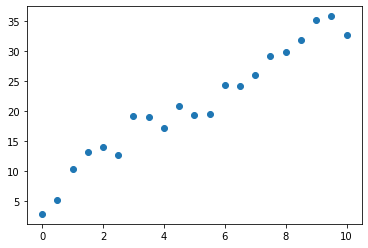

In [38]:
import matplotlib.pyplot as plt
import numpy as np

A = 0 # inicio
B = 10 # fin
N = 21 # mediciones
m = 3 # pendiente
b = 6 # intersección
k = 1.5 # aleatoriedad

x = np.linspace(A, B, N)
y = m * (x + np.random.uniform(-1, 1, N) * k) + b

plt.scatter(x, y)

En el siguiente código, se hace un `reshape` de `(N, 1)` al arreglo `x` de `N` puntos. Esto produce una matriz de tamaño `N x 1`, en lugar del vector de tamaño `N` que nombraremos como `X_train`. Esto se hace así porque se pretende hacer una regresión lineal tomando cada vector `x` y producir un valor `y`. Es decir, la regresión lineal, toma un vector en `x` y estima un valor en `y`, de esta manera ajusta una recta de la forma `y = m * x + b`. Pero nosotros sólo disponemos de un valor para `x`, por eso lo expresamos con un vector de tamaño `1`.

1. Si tuvieramos dos valores en `x` que ajustaran un valor en `y`. 
> **¿Cuál debería ser la figura de `x`? Opción A: `(N, 2)`, Opción B `(2 * N, 1)`.**
>> Opción A
2. Si tuvieramos una función f(x1, x2, x3) que se comportara linealmente. 
> ¿Cuál debería ser la figura de `x`? Opción A: `(N, 3)`, Opción B `(3 * N, 1)`
>> Opción A

In [39]:
X_train = x.reshape((N, 1))

X_train

array([[ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5],
       [ 2. ],
       [ 2.5],
       [ 3. ],
       [ 3.5],
       [ 4. ],
       [ 4.5],
       [ 5. ],
       [ 5.5],
       [ 6. ],
       [ 6.5],
       [ 7. ],
       [ 7.5],
       [ 8. ],
       [ 8.5],
       [ 9. ],
       [ 9.5],
       [10. ]])

El siguiente código importa la función `LinearRegression` de la librería `sklearn.linear_model`. Luego se crea un regresor, que es ajustado mediante `X_train`. Recordemos que `X_train` es la matriz de `Nx1` calculada arriba, dónde cada vector de entrenamiento `x`, producirá un valor en `y`. Por lo que entrenamos `([x1], y1)`, `([x2], y2)`, ..., `([xn], yn)`. Al final de ajustar cada punto, el regresor llamado `regressor` tendrá los valores de `coef_` e `intercept_` que indicarán cuál es la pendiente ajustada y el punto de intercepción.

1. **¿Cuál es la dimensión de `X_train`?** Es de dimensión 2
2. **¿Cuál es la figura de `X_train`?** Su figura es: (21, 1)
3. **¿Cuál es la dimensión de `y`?** Es de dimensión 1
4. **¿Cuál es la figura de `y`?** Su figure es: (21,)

In [47]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y)

[regressor.coef_, regressor.intercept_]

X_train.ndim
y.ndim
len(y)

21

En el siguiente código se extrae el primer coeficiente ajustado por el regresor lineal. Observa que `coef_` sólo contiene un coeficiente solamente.

1. **Si tuvieramos dos variables `x1`, `x2` que ajusten a `y`, ¿Cuántos coeficientes serían calculados?** Se calcularían dos
2. **¿Qué representa `m_fit`?** Representa el coeficiente para predecir un cierto valor de `y` en una regresión lineal

In [48]:
m_fit = regressor.coef_[0]

m_fit

2.9473756827884254

En el siguiente código se extrae el valor ajustado `intercept_`, que representa el punto de intercepción `b` o el `bias` de la recta `y = m * x + b`.

1. **Si tuvieramos dos variables `x1`, `x2` que ajusten a `y`, ¿Cuántas intercepciones serían calculados?** Solamente uno
2. **¿Qué representa `b_fit`?** Representa la ordenada en el que la regresión lineal intercepta al eje de las ordenadas

In [49]:
b_fit = regressor.intercept_

b_fit

6.3531999603502545

En el siguiente código se construye el arreglo `y_fit`, el cual se genera a partir de cada punto `x` multiplicado por `m_fit` y sumado con `b_fit`, para producir la recta con la pendiente y el punto de intersección ajustados. Luego se grafican de nuevo los puntos y la recta ajustada.

1. **Si tuvieramos dos variables `x1` y `x2` que ajustaran el valor `y`, ¿Qué tipo de gráfica sería conveniente?** Una gráfica 3D, por ejemplo, una surface plot
2. **¿Pará que sirve calcular la recta de predicción?** Para poder predecir un valor de `y` para un `x` en específico

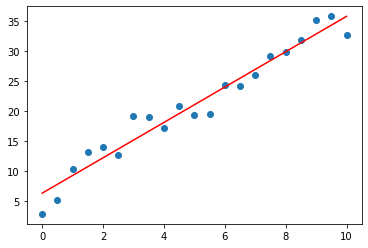

In [50]:
y_fit = m_fit * x + b_fit

plt.scatter(x, y)
plt.plot(x, y_fit, "red")